# TIME SERIES ANALYSIS PROJECT

# Stock Price Prediction with ARIMA

## Overview 📈✨
Welcome to the Stock Price Prediction model! I've harnessed the power of time series analysis using the ARIMA model to predict stock prices. Dive into the details to understand the complexity of transforming data, handling trends, seasonality, and ensuring stationarity.

## Problem Statement 🎯
Predicting stock prices is a challenging task in financial analytics. This model addresses the challenge by leveraging ARIMA, a robust time series forecasting technique.

## Why Stock Price Prediction Matters 💼
Stock price prediction plays a vital role in the financial world for several reasons:

- **Informed Decision-Making**: Investors rely on accurate predictions to make informed decisions, optimizing their portfolios and maximizing returns in the dynamic stock market.
  
- **Risk Management**: Financial institutions use predictive models to assess and manage risks associated with stock investments, contributing to overall financial stability.

## Key Features 🛠️
- **Transformation**: Utilizing data transformation techniques for better model performance.
  
- **Trend and Seasonality Removal**: Employing methods to eliminate trends and seasonality from stock price data.
  
- **ACF and PACF Analysis**: Conducting AutoCorrelation Function and Partial AutoCorrelation Function analyses to determine model parameters.
  
- **Stationarity Check**: Verifying stationarity through the Dickey-Fuller test.

## Benefits 🌟
- **Accurate Predictions**: The ARIMA model, with its careful tuning and preprocessing steps, enables accurate predictions of stock prices.
  
- **Informed Decision-Making**: Investors and financial analysts can use the model's predictions to make informed decisions in the dynamic stock market.
  
- **Learning Opportunities**: As a second-year data science student, exploring this project provides insights into advanced time series analysis techniques and their application in real-world financial data.

## Project Details 📊
### Data
The model is trained on historical stock price data.

### Preprocessing Steps
- **Transformation**: Log to stabilize variance.
  
- **Trend and Seasonality Removal**: Techniques such as differencing and moving average.
  
- **ACF and PACF Analysis**: Identifying lag values for the ARIMA model.
  
- **Stationarity Check**: Using the Dickey-Fuller test to ensure stationarity.

### Model Training
The ARIMA model is trained with the parameters derived from ACF and PACF analyses, ensuring optimal forecasting capabilities.

## Learning Opportunities 🧠
This project provides an excellent opportunity for a second-year data science student to explore and understand advanced time series analysis techniques in the context of financial data.



### Here, I embark on my Time Series Project! 🚀

#### Here, we import the necessary python libraries for data preprocessing and visualisation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

#### Reading the data

In [4]:
df=pd.read_csv("Microsoft_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


#### Here, the date variable is in object data type , have to convert it into data time

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


#### Since we are working with time series, the most essential features are the time related feature. So , we will convert dataime to index

In [11]:
df.set_index("Date",inplace=True)

In [12]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [14]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


## Data Visualization

#### Let's draw a chart showing how volume , high and low prices hanges over time .

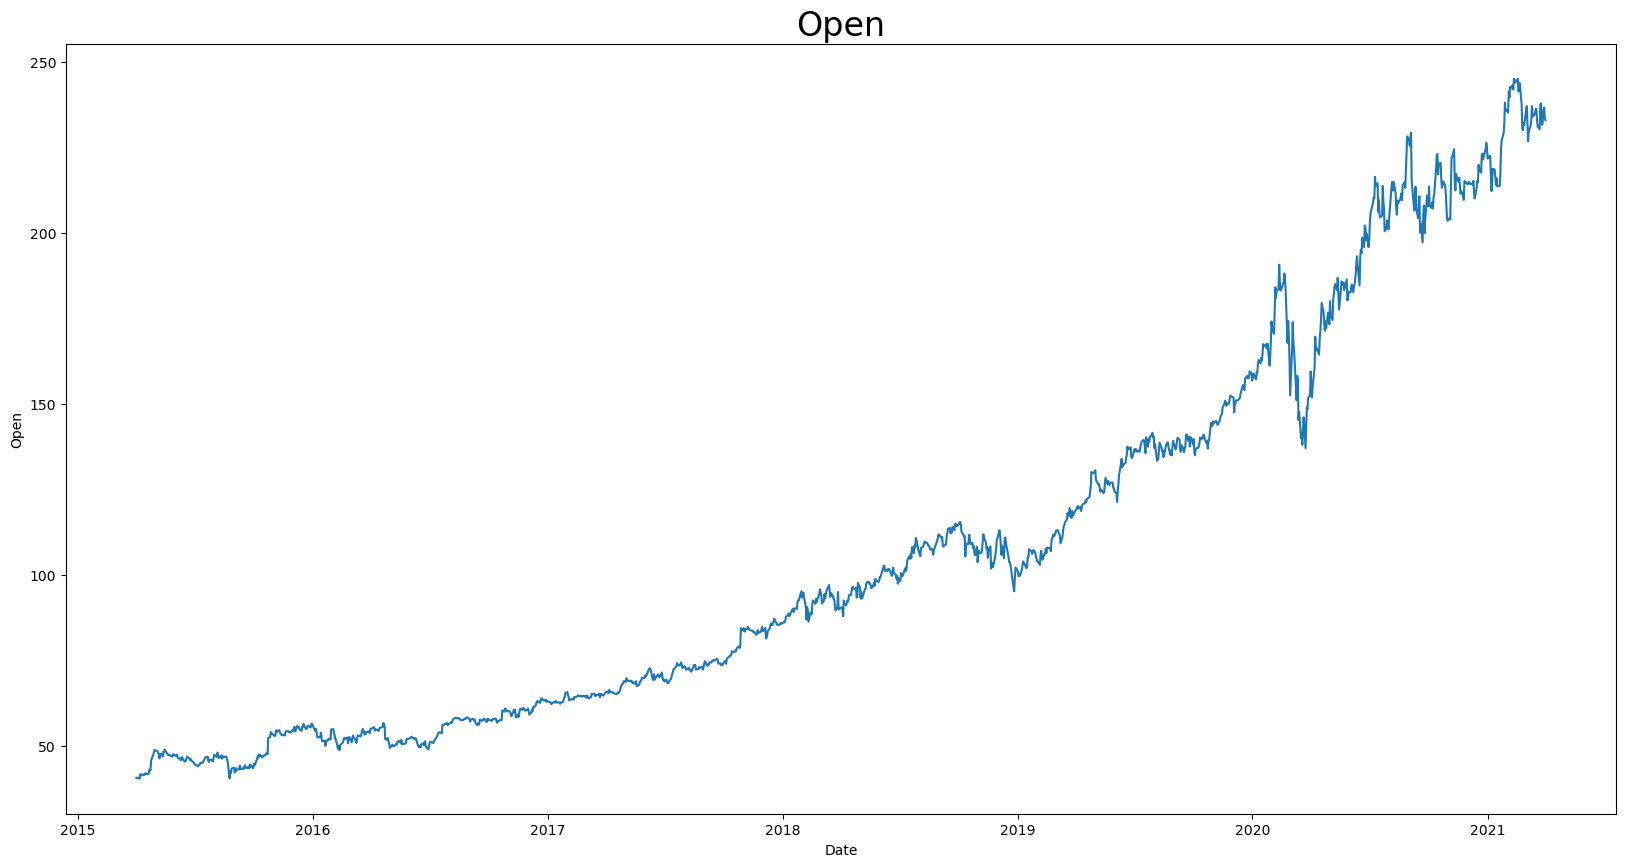

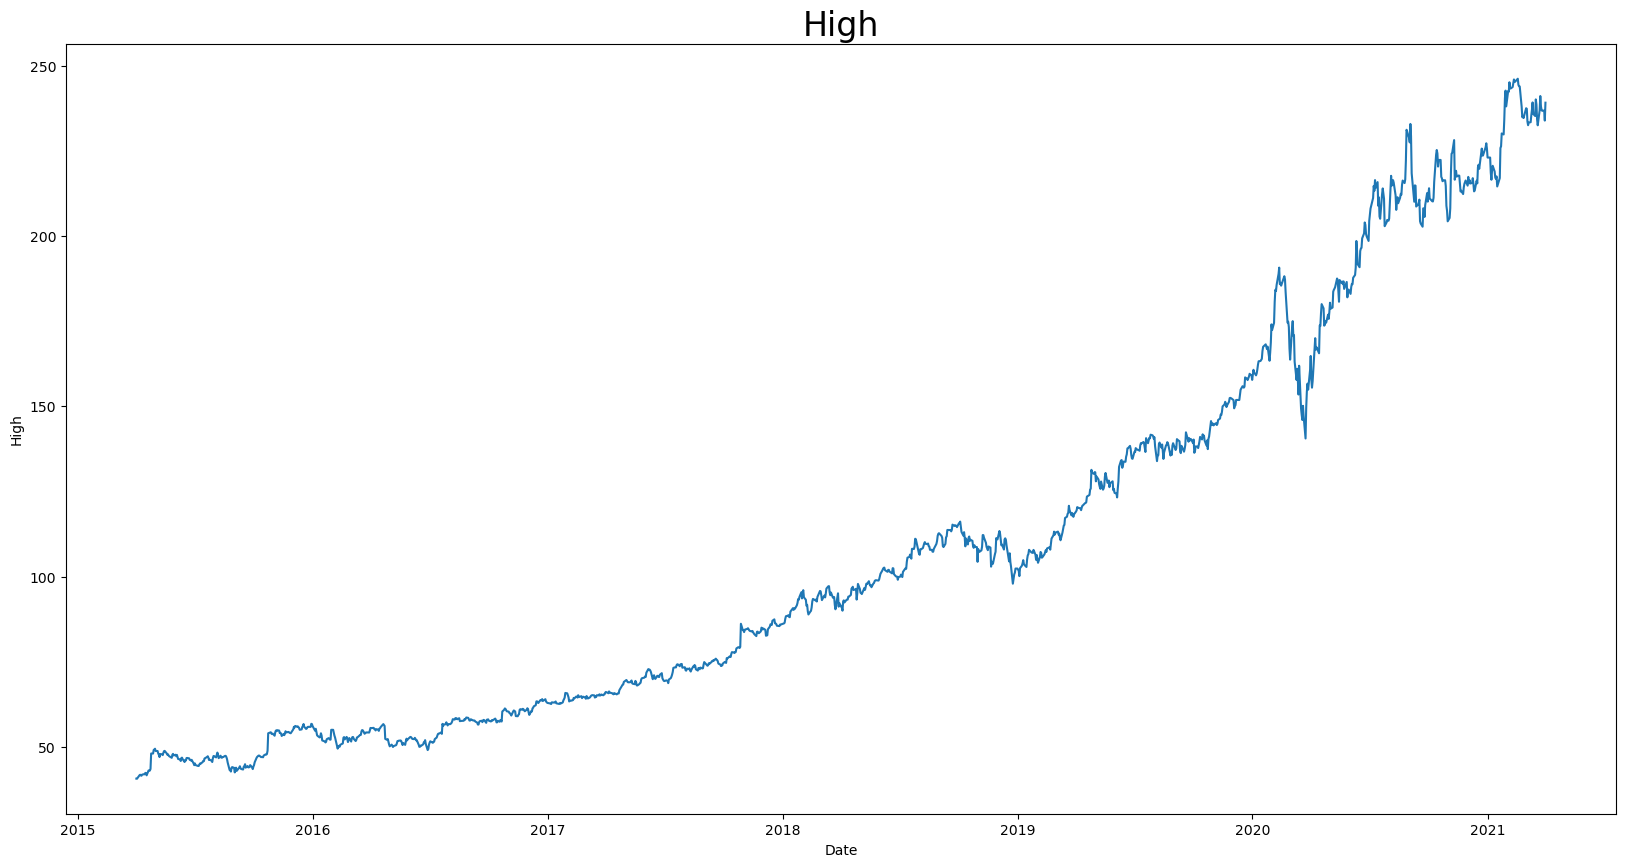

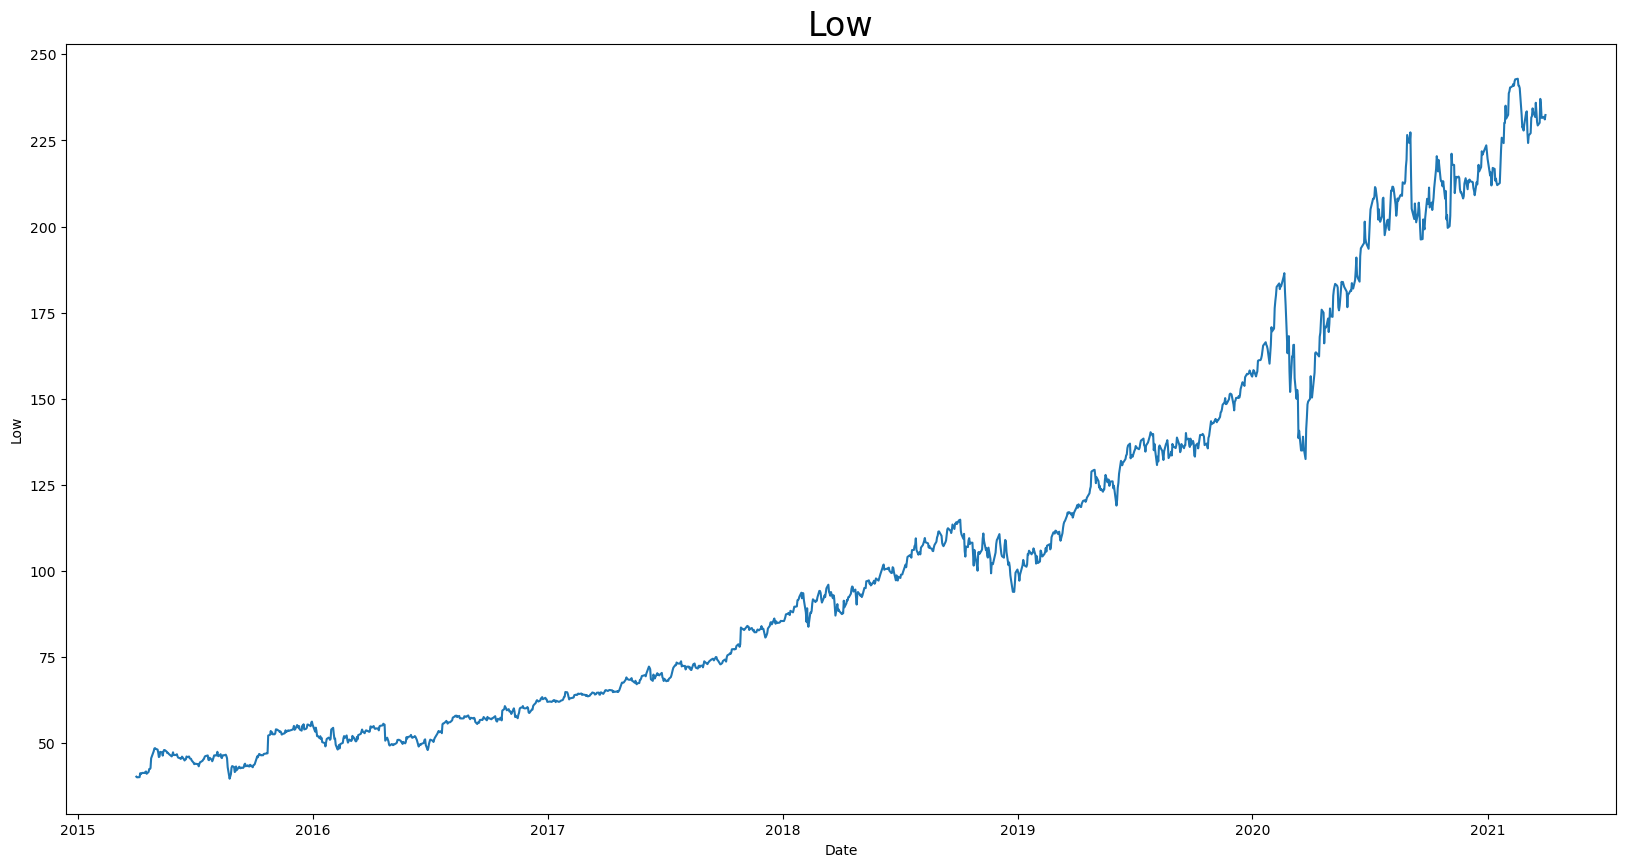

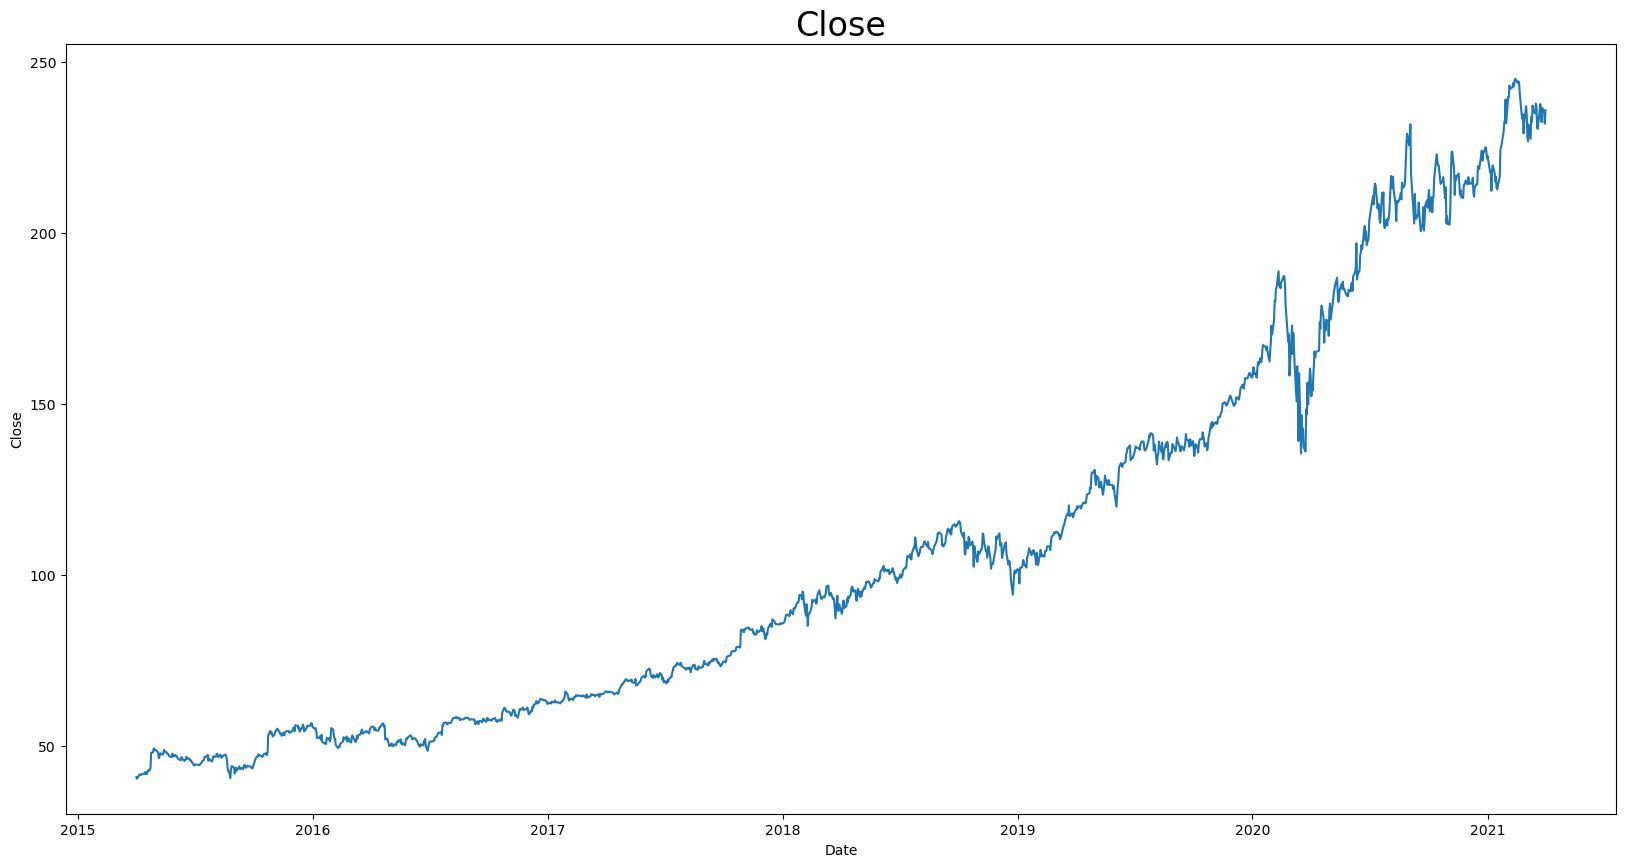

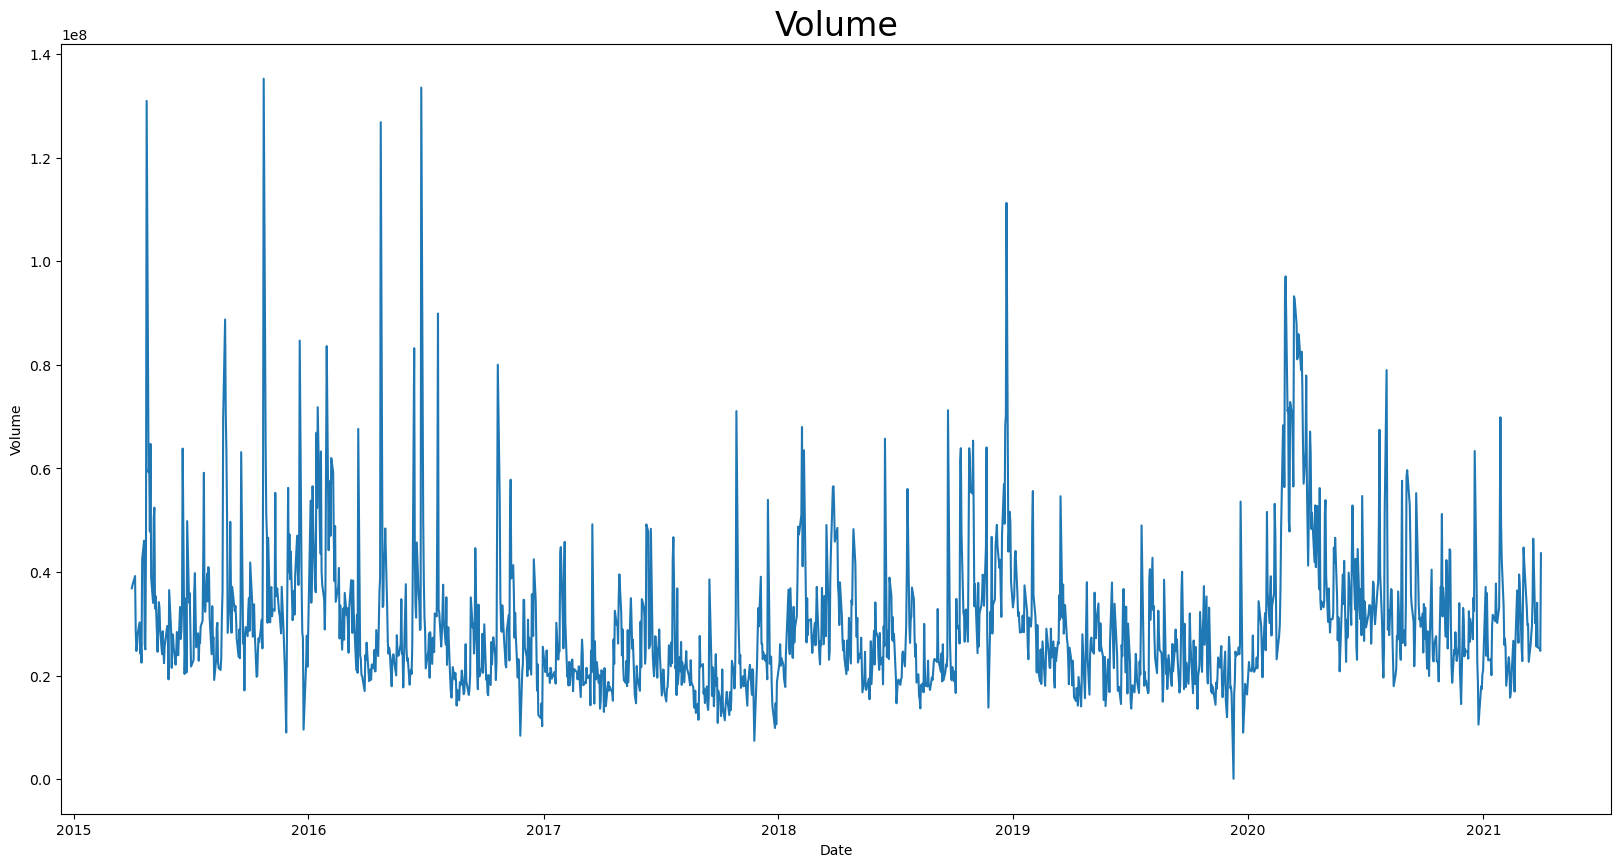

In [16]:
for col in df.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = df.index ,y = df[col],data = df)
    plt.title(col , fontsize=24)
    plt.show()

#### It’s clear from the plots that there is an overall increase in the trend,with some seasonality in Volume plot

## STATIONARITY

#### This is a very important concept in Time Series Analysis. In order to apply a time series model,we have to make sure that the data should be be stationary

#### In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

• constant mean

• constant variance

• an auto co-variance that does not depend on time.

#### Now , we have to apply Dickey Fuller Test to check stationarity. Firstly, will have to consider the null hypothesis: the time series is non- stationary, I result will be dependent on the citical value , i.e. p-value<=0.05 , then will reject the null hypothesis and say that the data is Stationary else vice versa

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries)
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

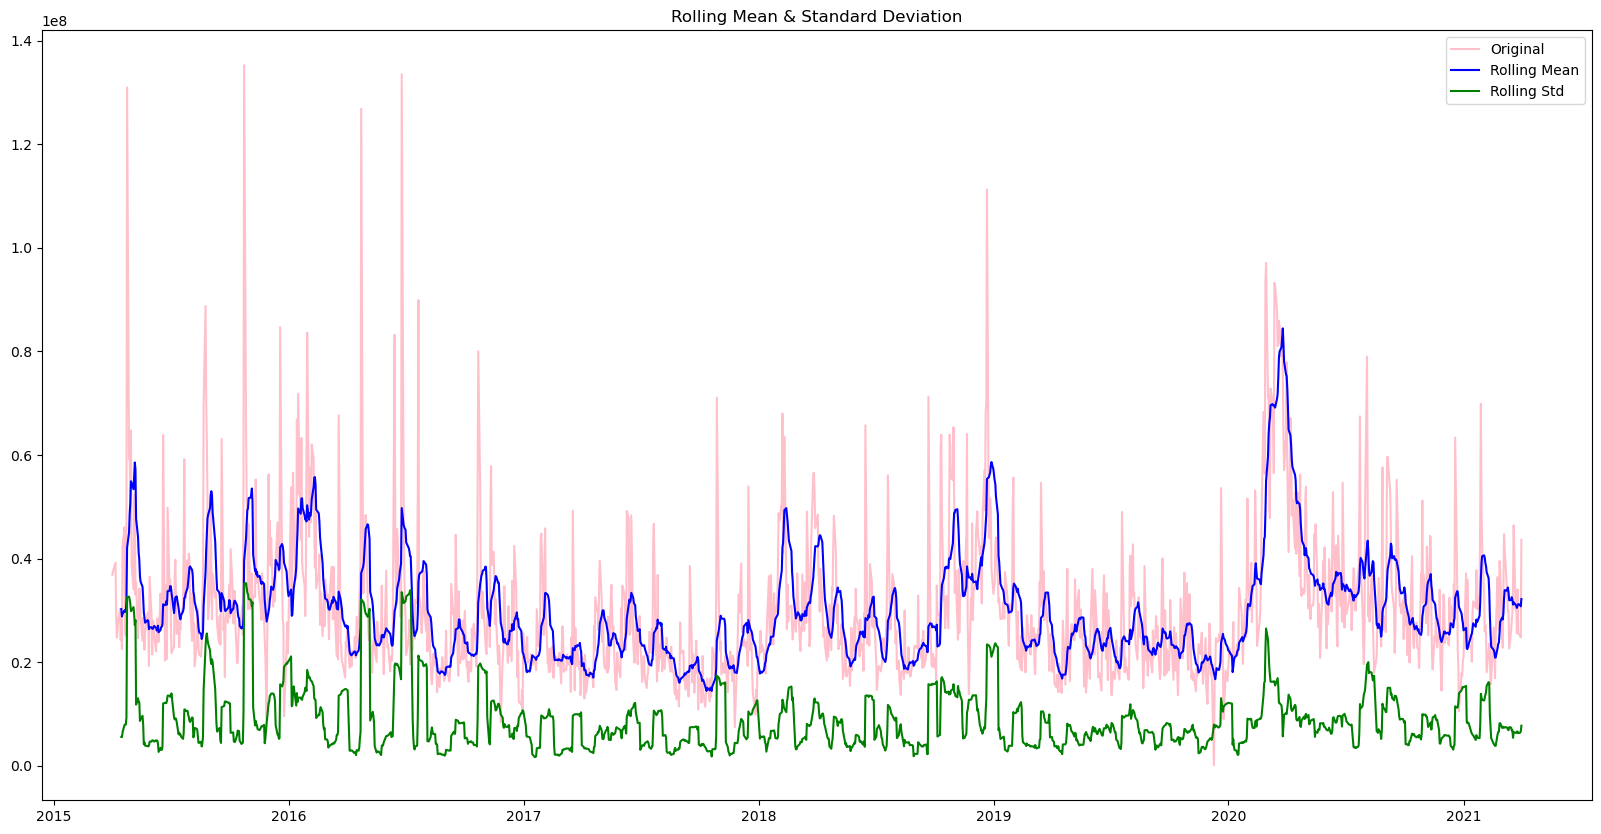

Results of Dickey-Fuller Test:
Test Statistic                -6.899656e+00
p-value                        1.291812e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.502000e+03
Critical Value (1%)           -3.434711e+00
Critical Value (5%)           -2.863466e+00
Critical Value (10%)          -2.567795e+00
dtype: float64


In [19]:
test_stationarity(df['Volume'])

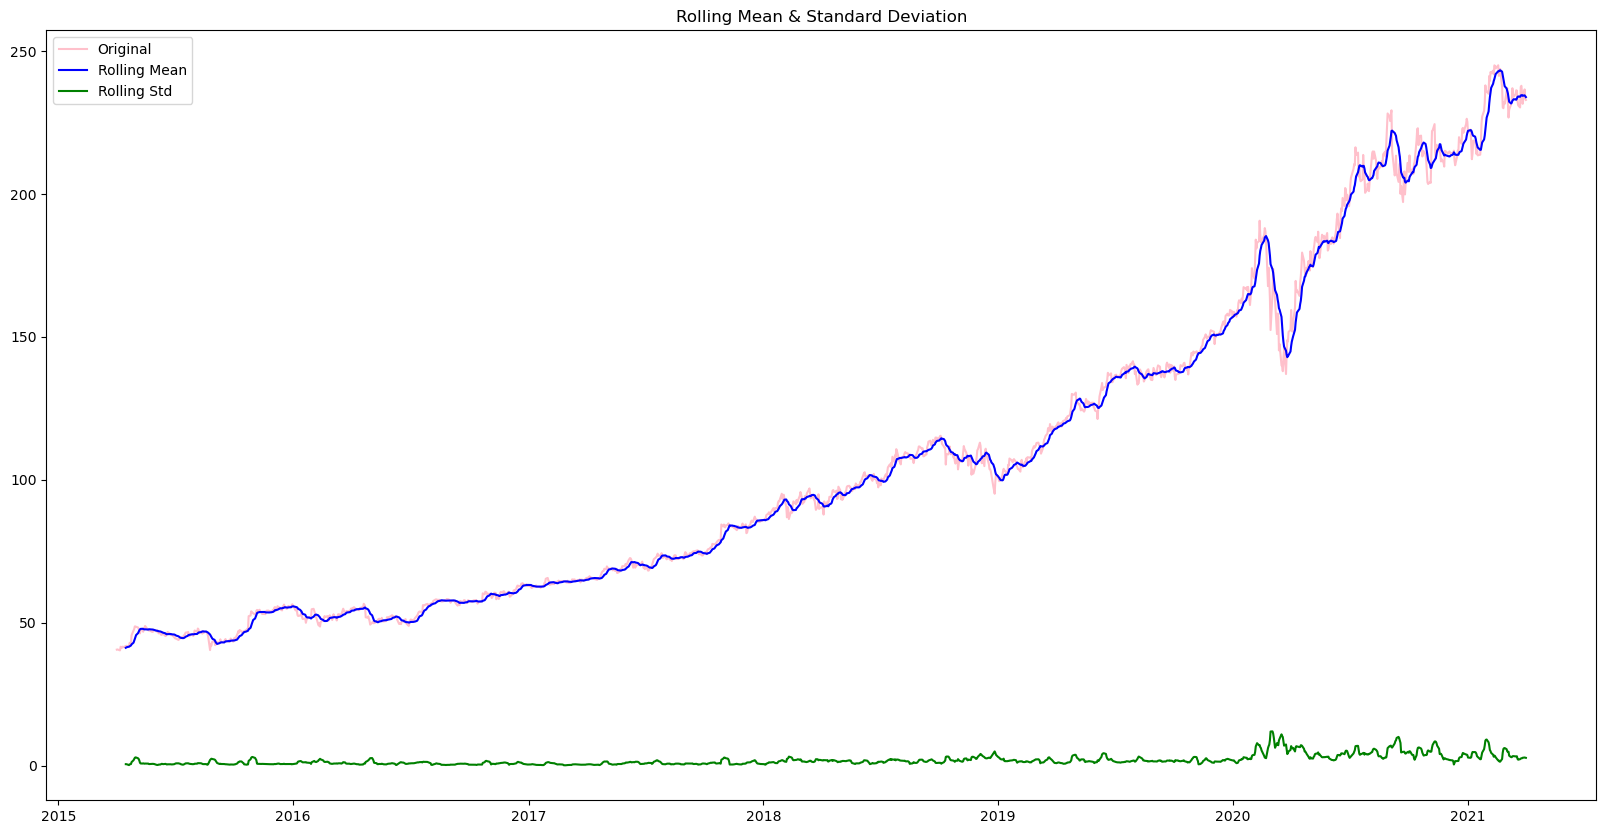

Results of Dickey-Fuller Test:
Test Statistic                    0.823915
p-value                           0.992013
#Lags Used                        2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [21]:
test_stationarity(df['Open'])

#### This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > p-value.

## TREND

#### The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend.                                     Here, will use logarithm transformation

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


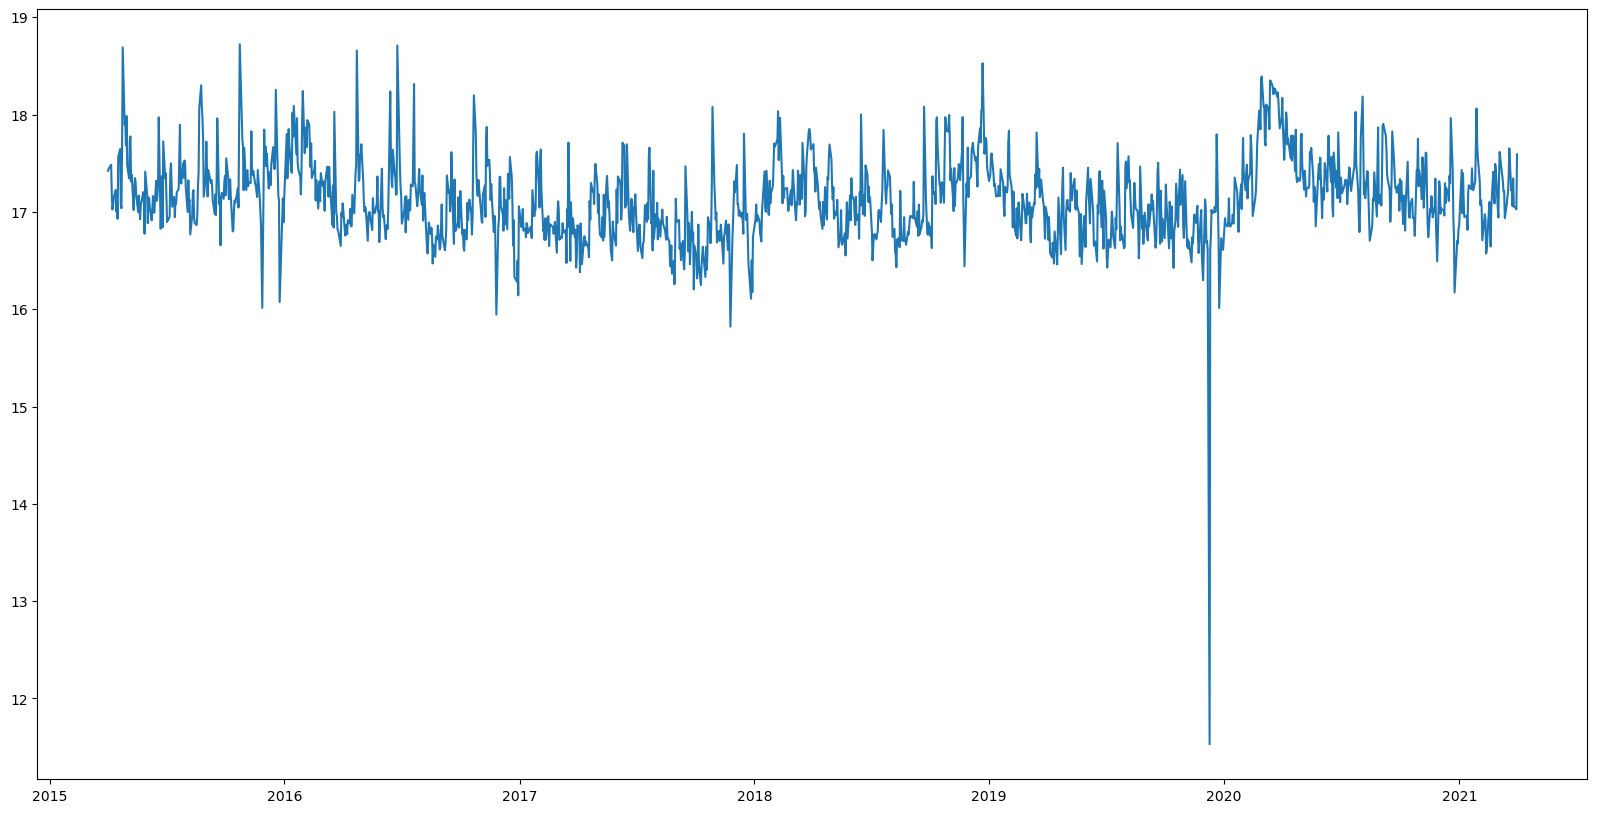

In [23]:
plt.figure(figsize=(20,10))
ts_log=np.log(df['Volume'])
plt.plot(ts_log)

#### There is some noise in realizing the forward trend here. 

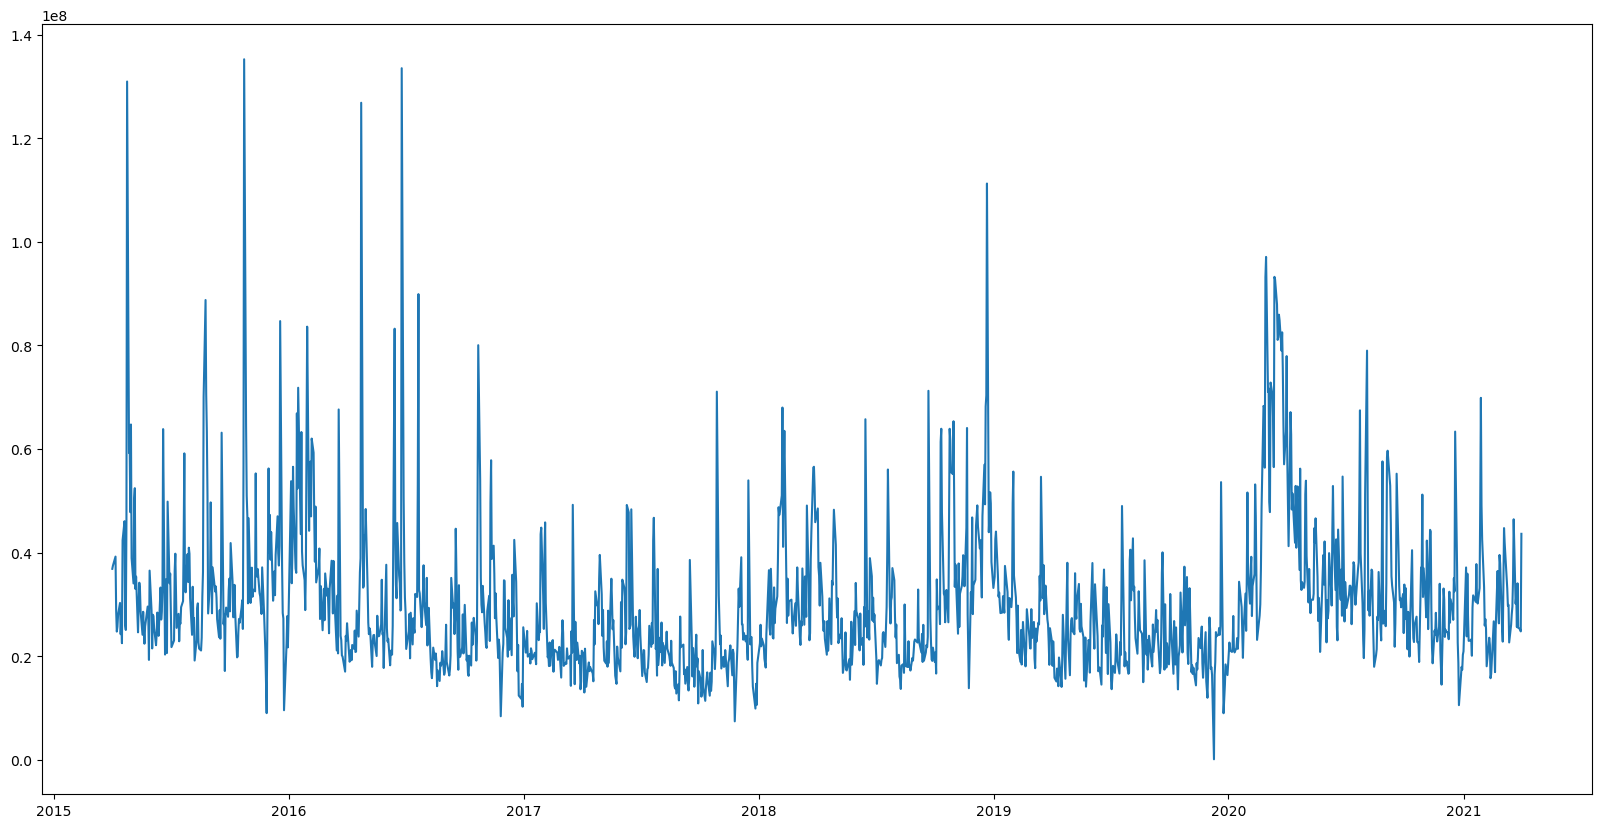

In [24]:
plt.figure( figsize=(20,10) )
plt.plot(df['Volume'])

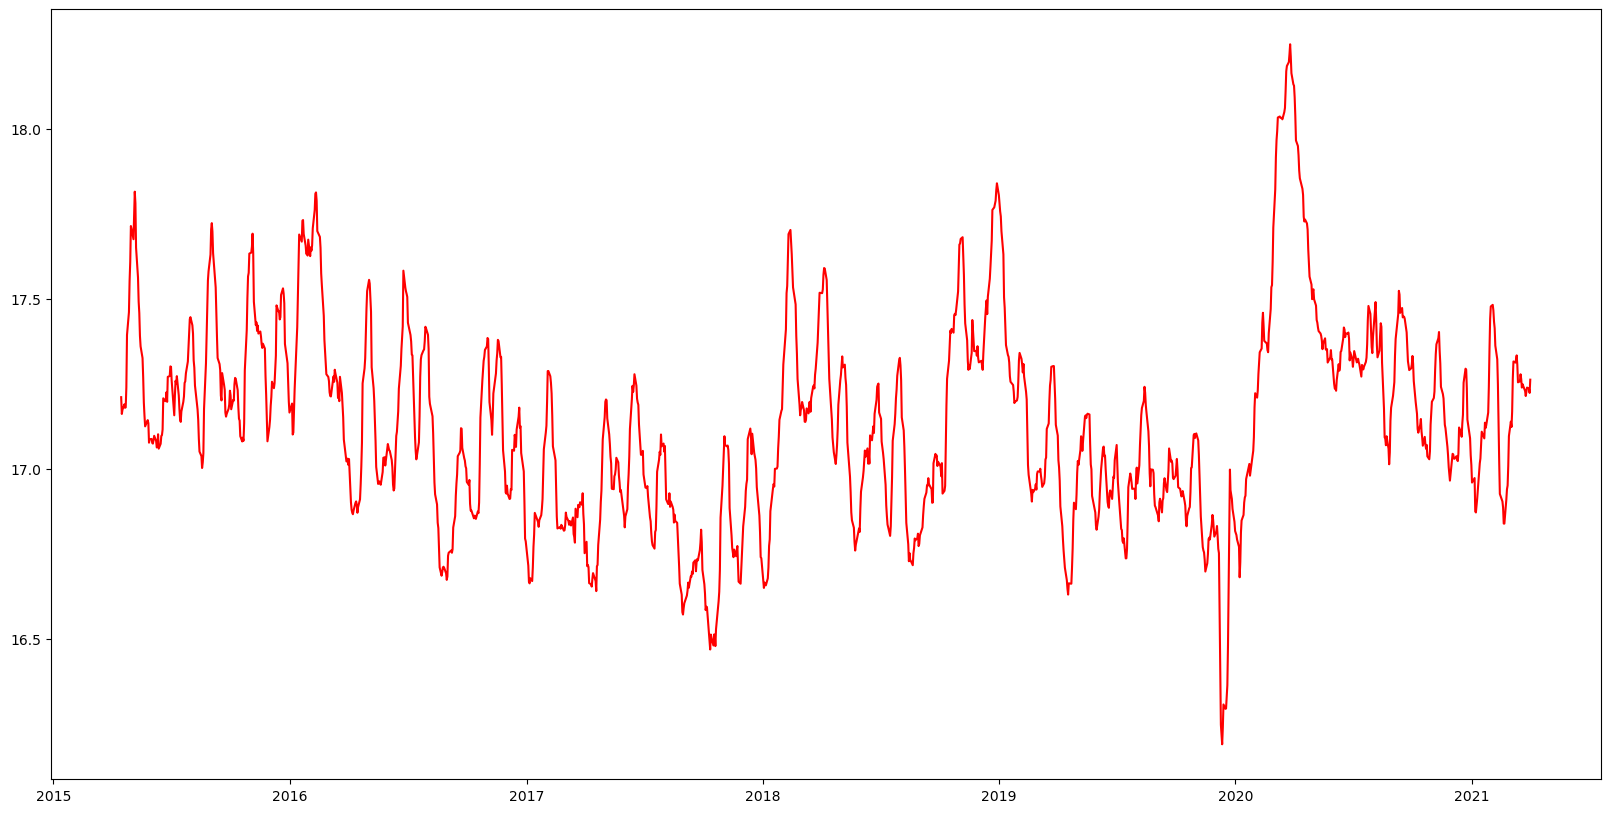

In [25]:
plt.figure(figsize=(20,10))
moving_averge=ts_log.rolling(window = 10).mean()
plt.plot(moving_averge , color='red')

##### Now subtract the rolling mean from the original series.

In [26]:
moving_avg_diff= ts_log-moving_averge
moving_avg_diff

Date
2015-04-01 16:00:00         NaN
2015-04-02 16:00:00         NaN
2015-04-06 16:00:00         NaN
2015-04-07 16:00:00         NaN
2015-04-08 16:00:00         NaN
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1511, dtype: float64

In [27]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
2015-04-15 16:00:00   -0.087286
2015-04-16 16:00:00   -0.232491
2015-04-17 16:00:00    0.388136
2015-04-20 16:00:00    0.455114
2015-04-21 16:00:00   -0.105945
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1502, dtype: float64

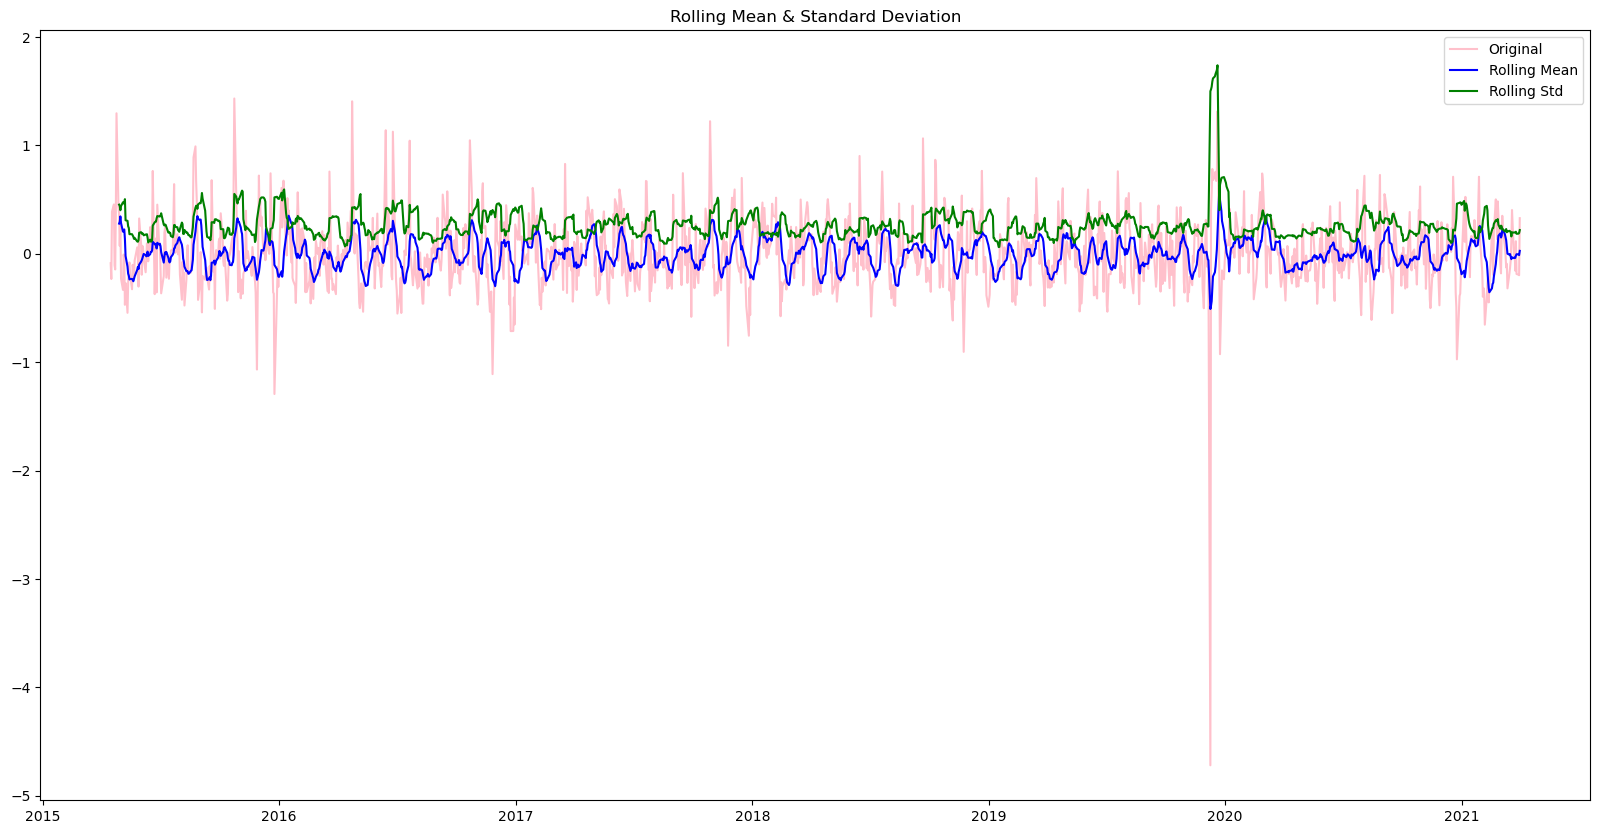

Results of Dickey-Fuller Test:
Test Statistic                -1.222250e+01
p-value                        1.099157e-22
#Lags Used                     2.000000e+01
Number of Observations Used    1.481000e+03
Critical Value (1%)           -3.434773e+00
Critical Value (5%)           -2.863494e+00
Critical Value (10%)          -2.567810e+00
dtype: float64


In [28]:
test_stationarity(moving_avg_diff)

## Differencing

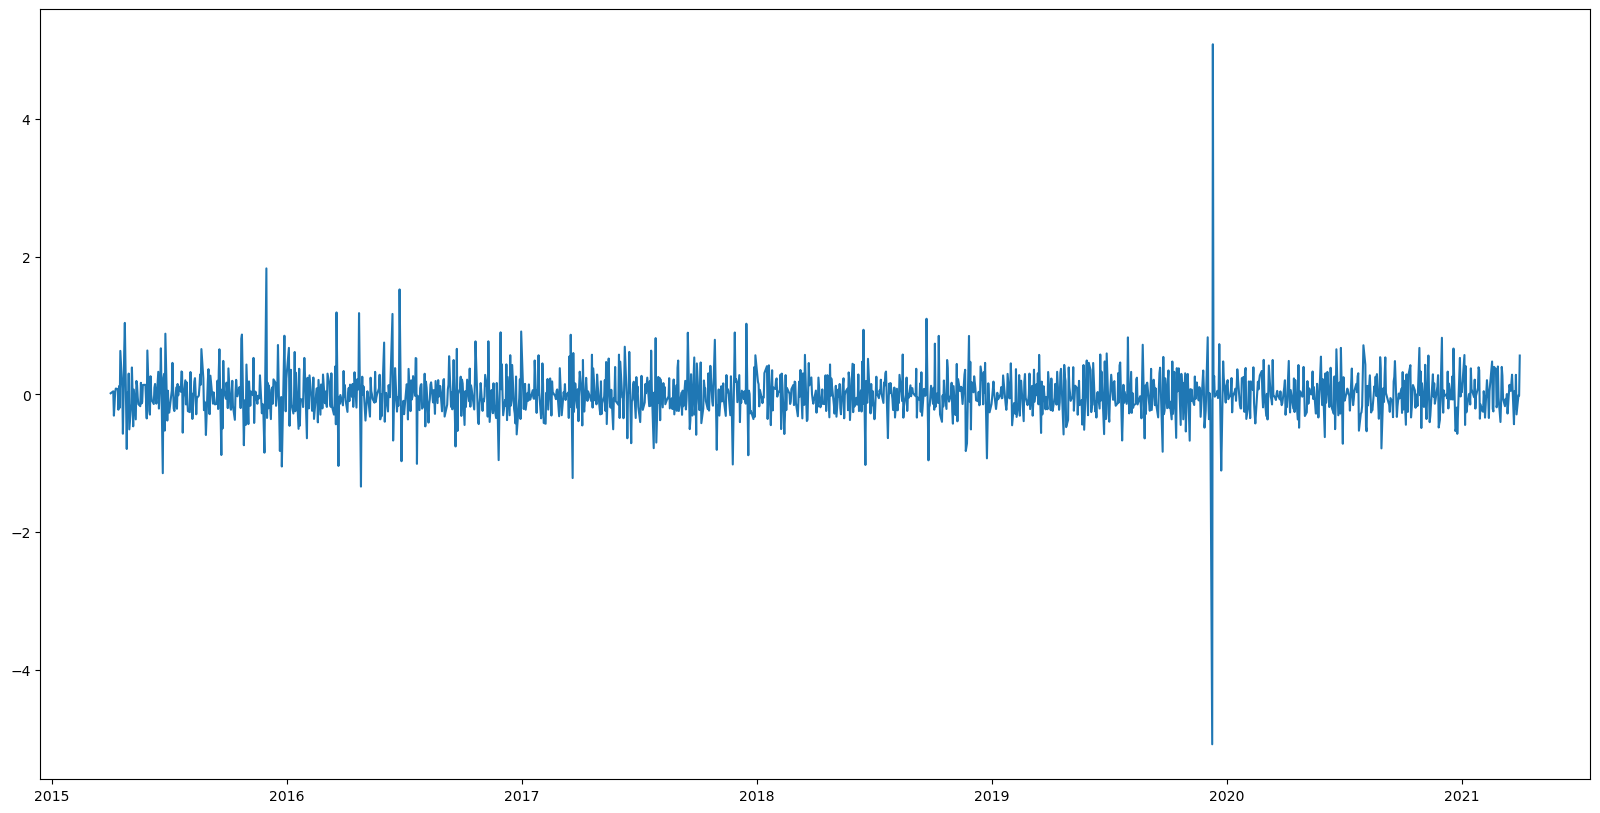

In [29]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

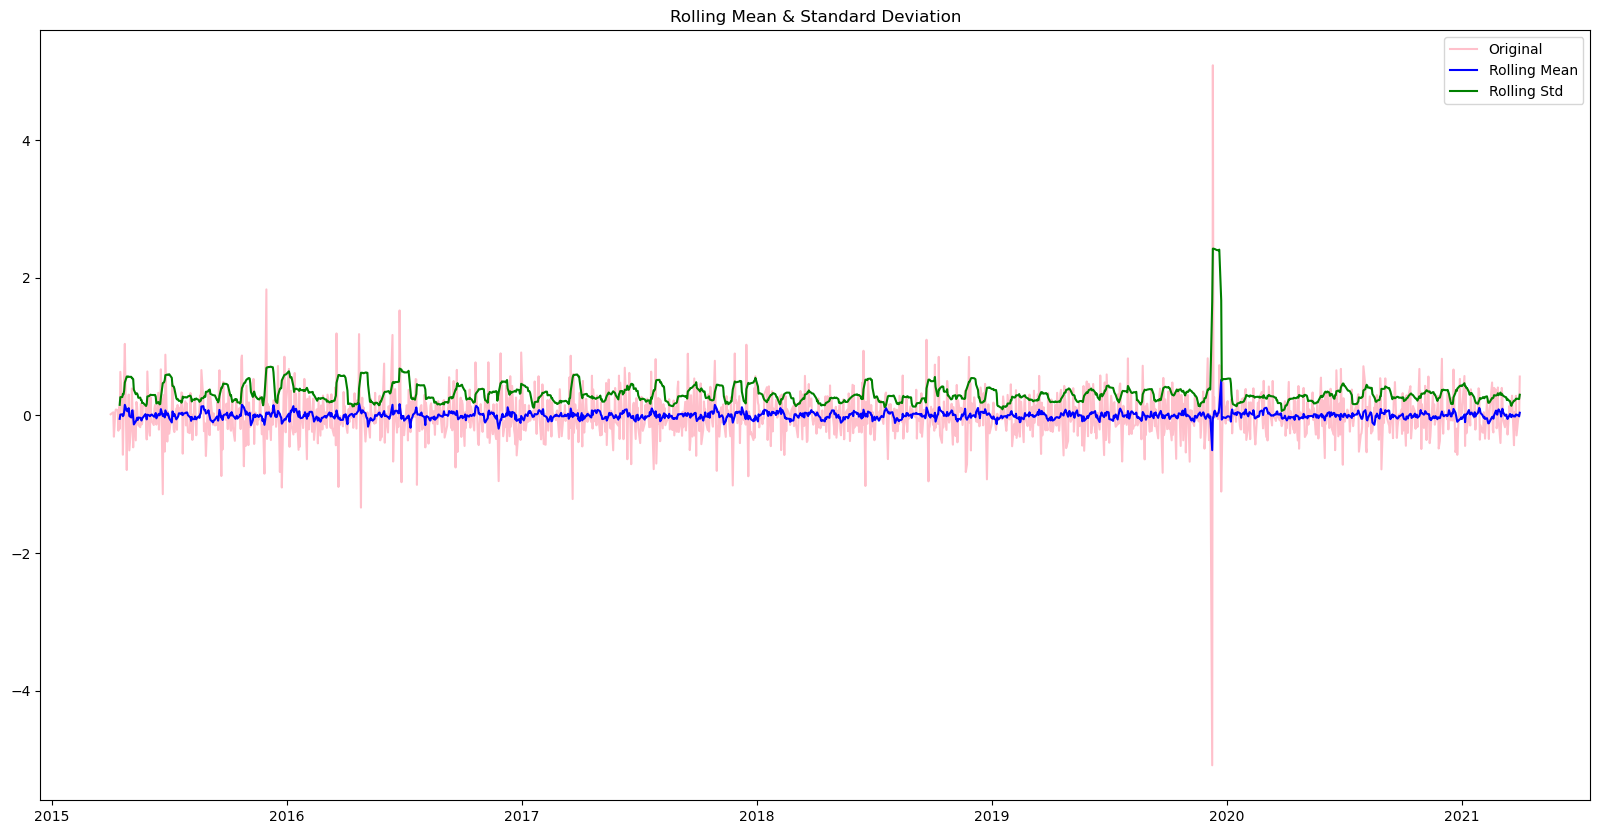

Results of Dickey-Fuller Test:
Test Statistic                -1.277553e+01
p-value                        7.608278e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [30]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# MODELLING

#### Now let’s check out on how we can figure out what value of p and q to use.

• Autocorrelation Function (ACF)

• Partial Autocorrelation Function (PACF)

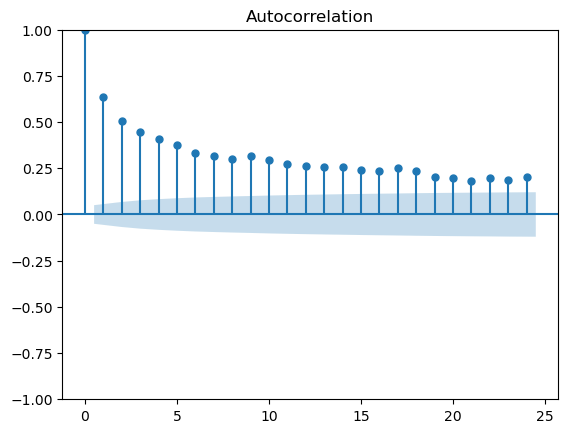

<Figure size 1500x1500 with 0 Axes>

In [34]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(df['Volume'], lags=24 )
plt.figure(figsize=(15,15))
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


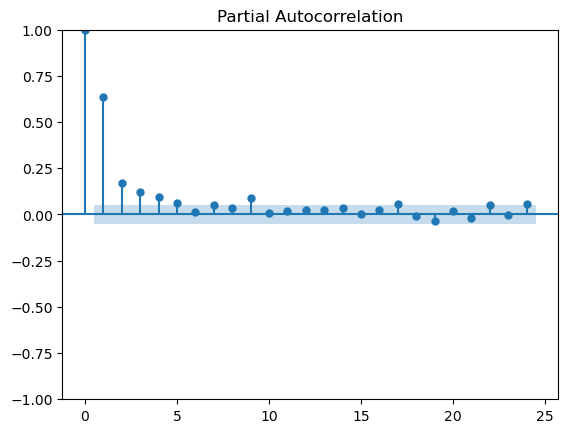

<Figure size 2000x1000 with 0 Axes>

In [35]:
tsaplots.plot_pacf(df['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# ARIMA MODEL

#### AUTO REGESSIVE INTEGRATED MOVING AVERAGE

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Fri, 09 Feb 2024   AIC                          53179.547
Time:                        13:17:11   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

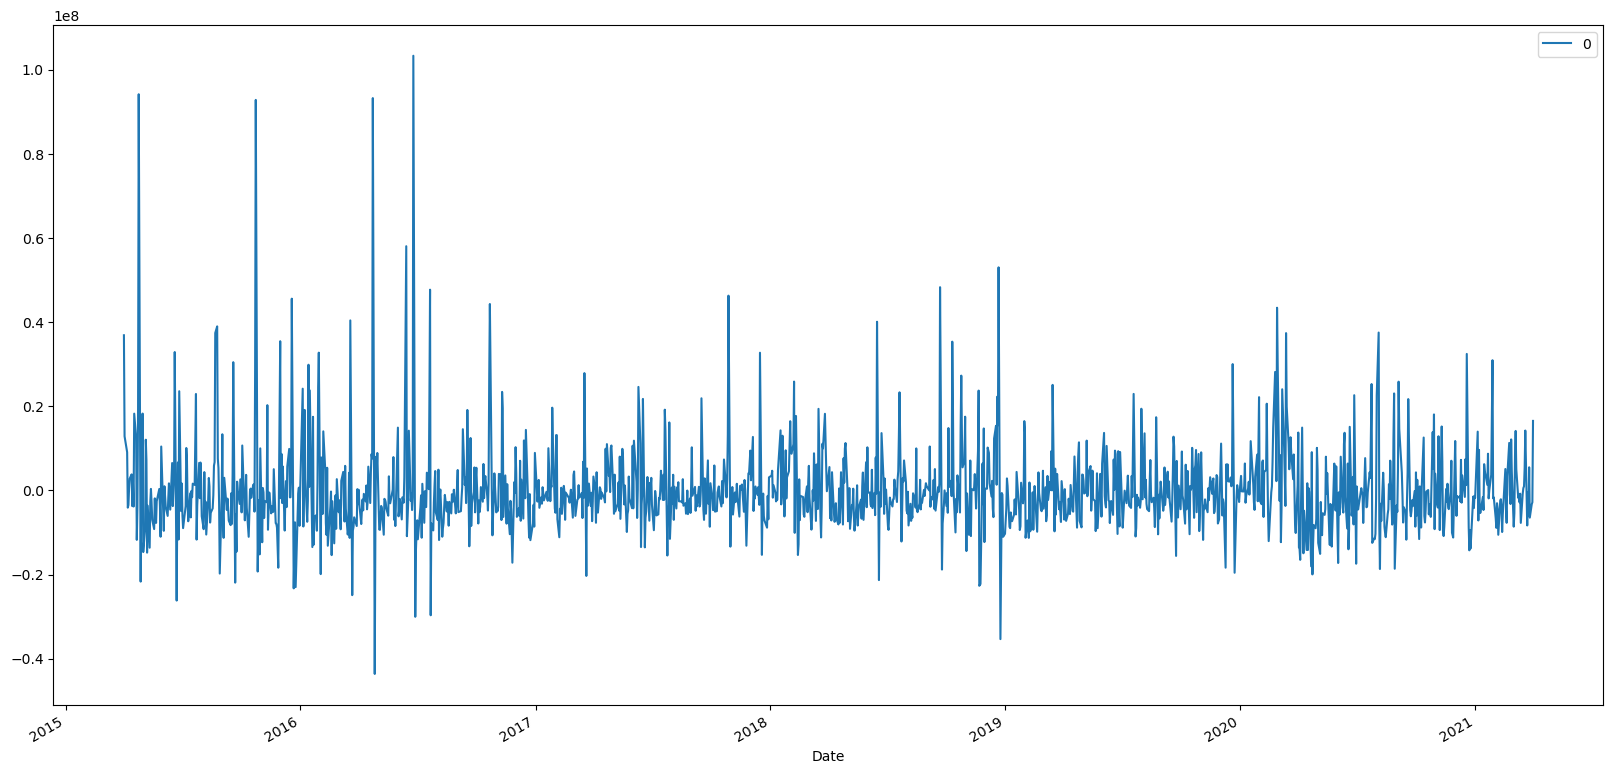

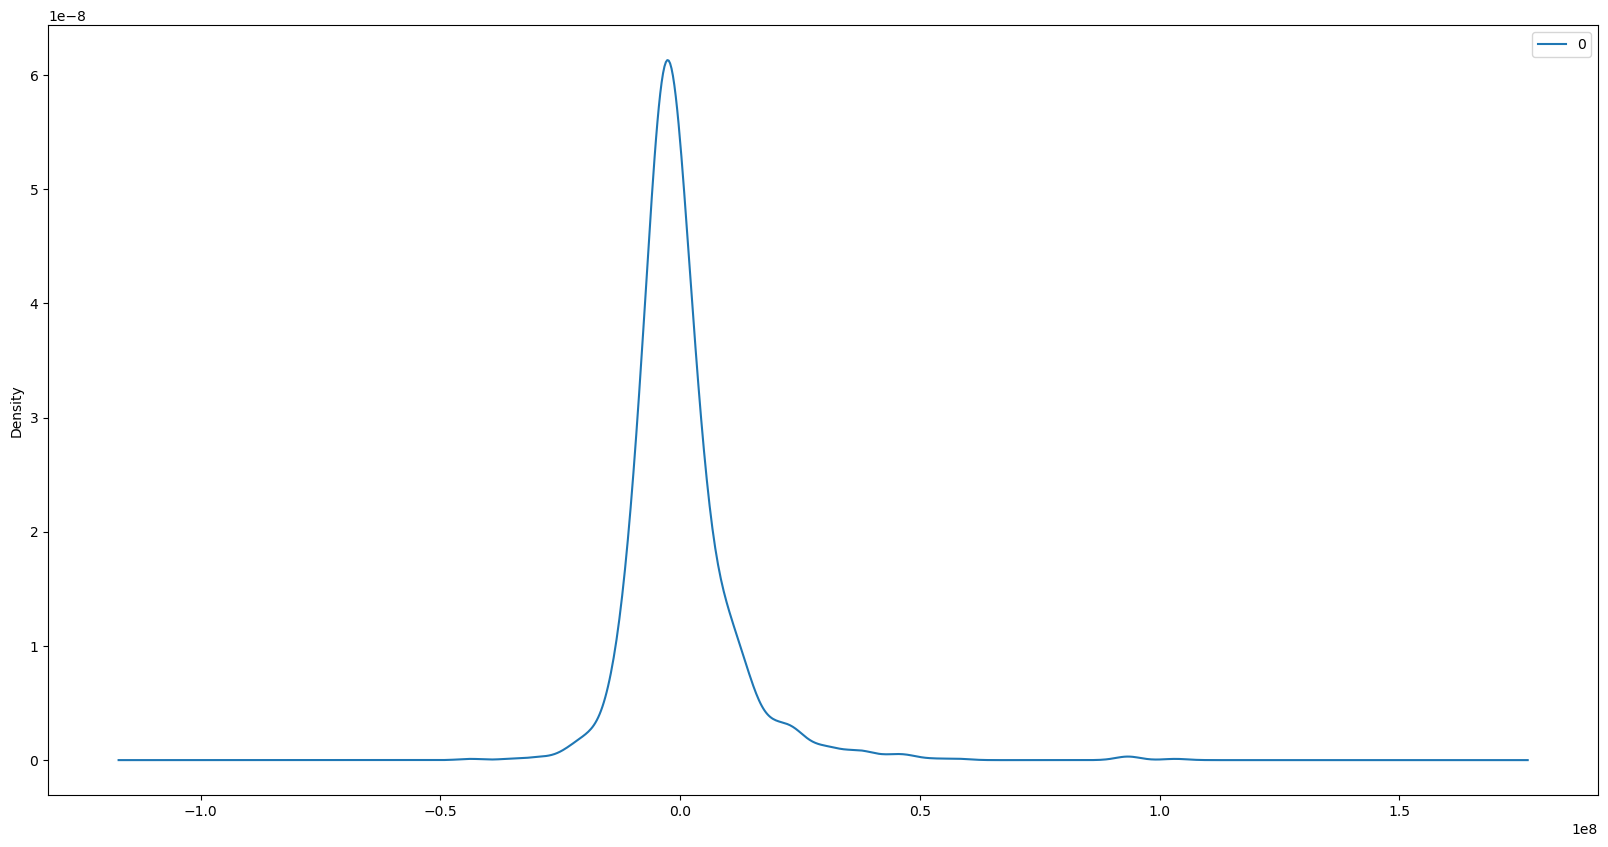

                  0
count  1.511000e+03
mean   5.605306e+04
std    1.075570e+07
min   -4.362672e+07
25%   -5.315695e+06
50%   -1.731173e+06
75%    3.282732e+06
max    1.032959e+08


In [39]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())

We've reached the end of this exciting Time Series Project. As a second-year data science enthusiast, this journey has been a valuable exploration into the intricate world of stock price prediction using ARIMA.🎉

## What Have We Accomplished? 🚀

- **Insights Gained**: We've delved into the nuances of time series analysis, extracting valuable insights from historical stock price data.

- **Predictive Power**: The ARIMA model, with its careful tuning and preprocessing, now stands as a powerful tool for accurate stock price predictions.
